Το γράφημα αποθηκεύτηκε ως 'kp_vs_speed_plot.pdf'.


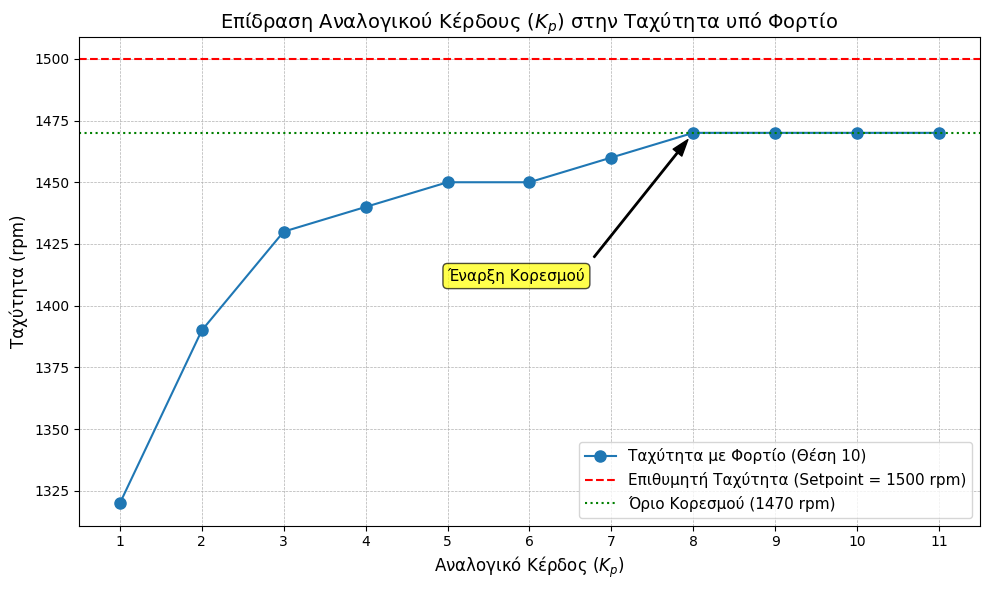

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Δεδομένα από τον Πίνακα 7
Kp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Speed_Load_10 = [1320, 1390, 1430, 1440, 1450, 1450, 1460, 1470, 1470, 1470, 1470]
Setpoint = 1500

# Δημιουργία Γραφήματος
plt.figure(figsize=(10, 6))

# Κύρια γραμμή δεδομένων
plt.plot(Kp, Speed_Load_10, marker='o', linestyle='-', markersize=8, label='Ταχύτητα με Φορτίο (Θέση 10)')

# Γραμμή Setpoint
plt.axhline(y=Setpoint, color='r', linestyle='--', label=f'Επιθυμητή Ταχύτητα (Setpoint = {Setpoint} rpm)')

# Γραμμή Κορεσμού
plt.axhline(y=1470, color='g', linestyle=':', label=f'Όριο Κορεσμού ({1470} rpm)')

# Σημείωση για την έναρξη του κορεσμού
plt.annotate('Έναρξη Κορεσμού',
             xy=(8, 1470),  # Το σημείο που δείχνει το βέλος
             xytext=(5, 1410), # Η θέση του κειμένου
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="k", lw=1, alpha=0.7))

# Τίτλοι και Ετικέτες
plt.title('Επίδραση Αναλογικού Κέρδους ($K_p$) στην Ταχύτητα υπό Φορτίο', fontsize=14)
plt.xlabel('Αναλογικό Κέρδος ($K_p$)', fontsize=12)
plt.ylabel('Ταχύτητα (rpm)', fontsize=12)
plt.xticks(Kp) # Δείξε όλες τις τιμές Kp στον άξονα Χ
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=11)
plt.tight_layout() # Προσαρμόζει το γράφημα για να χωράει καλά

# Αποθήκευση του γραφήματος σε αρχείο PDF (ιδανικό για LaTeX/Overleaf)
plt.savefig('kp_vs_speed_plot.pdf')

print("Το γράφημα αποθηκεύτηκε ως 'kp_vs_speed_plot.pdf'.")
# plt.show() # Μπορείτε να το απο-σχολιάσετε για να δείτε το γράφημα

--- Μέρος Α, Ερώτημα 3 (Από Πίνακες 1 & 2) ---


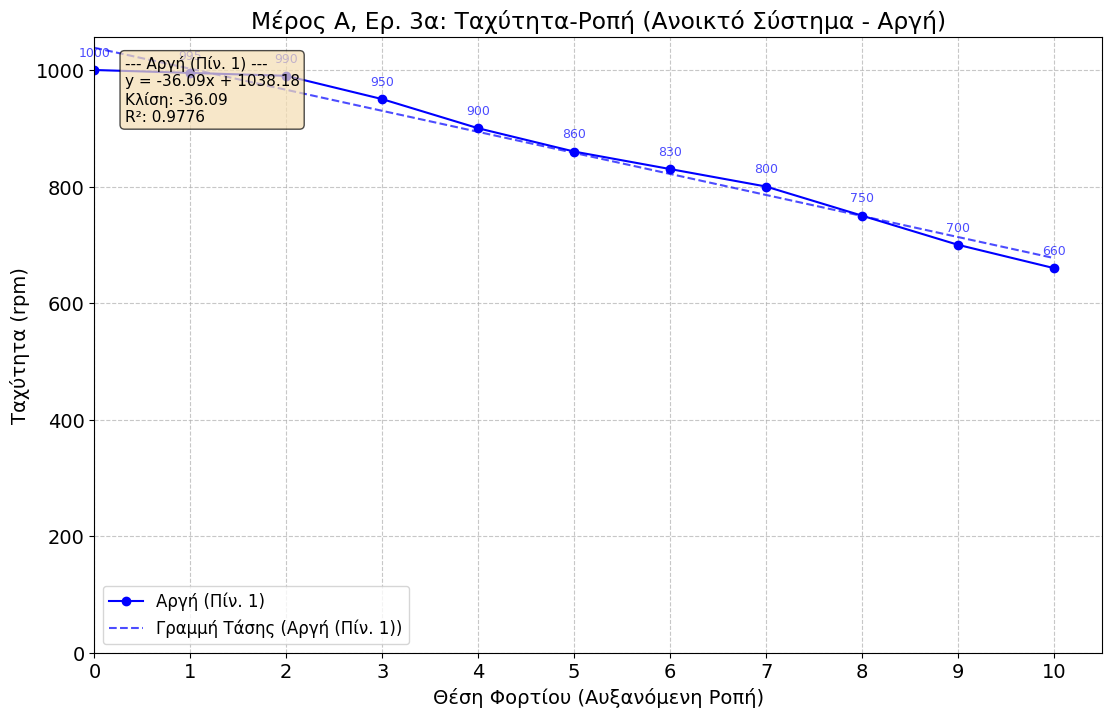

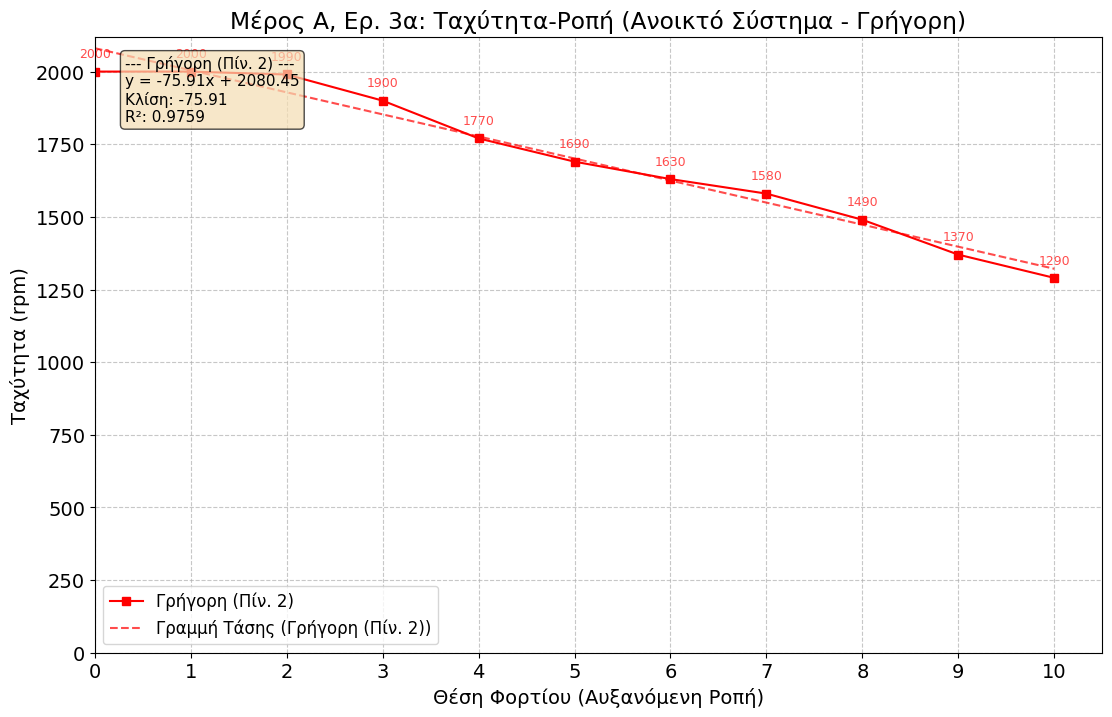

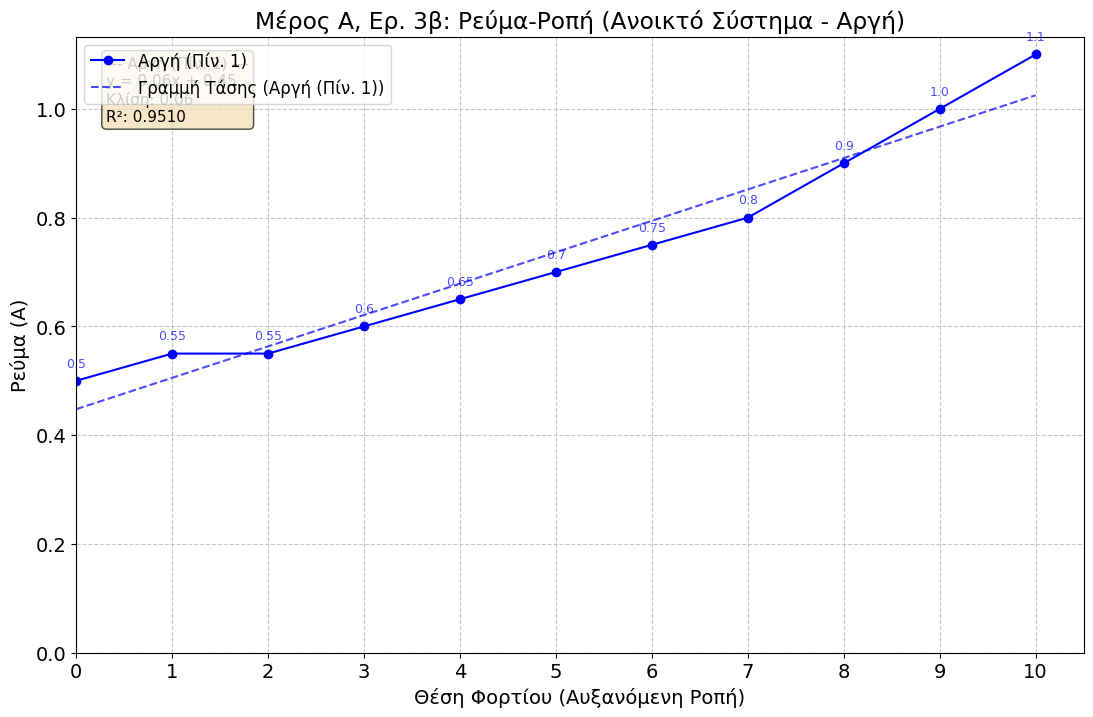

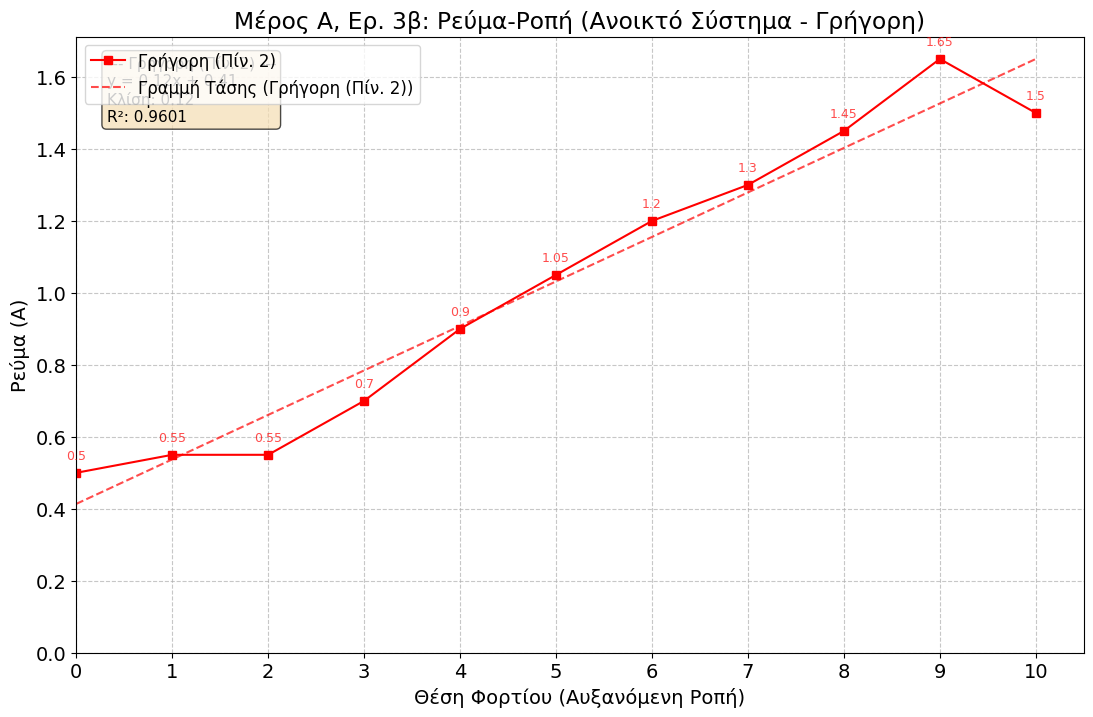

--- Μέρος Α (Β2), Ερώτημα 3 (Από Πίνακες 3 & 4) ---


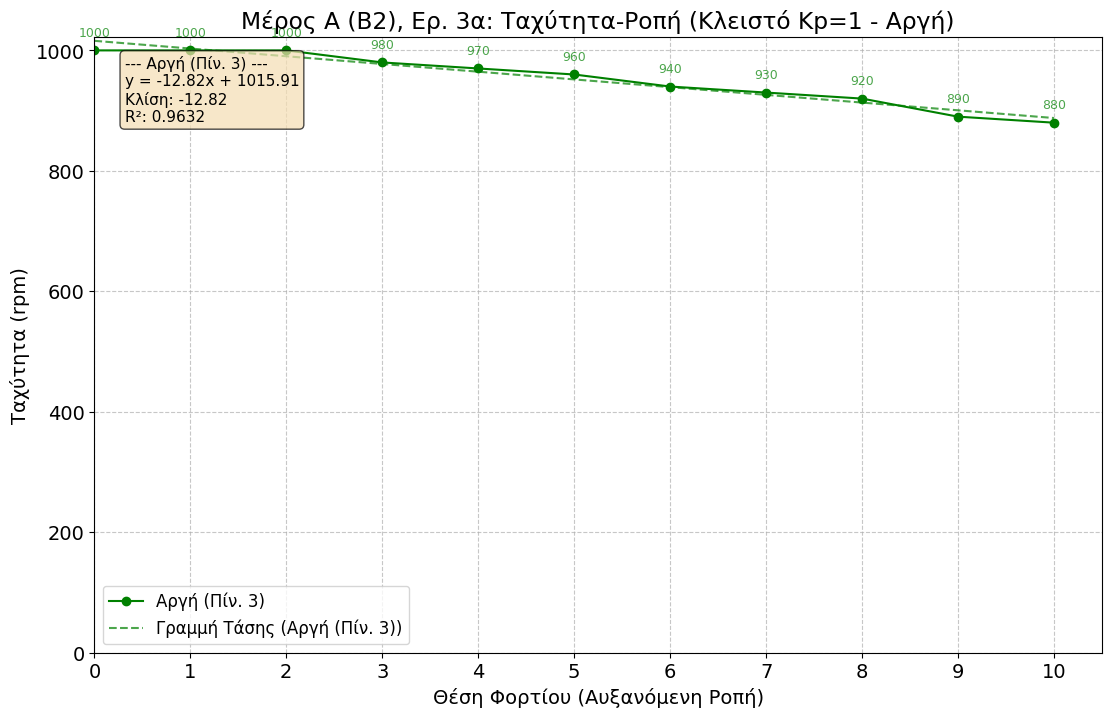

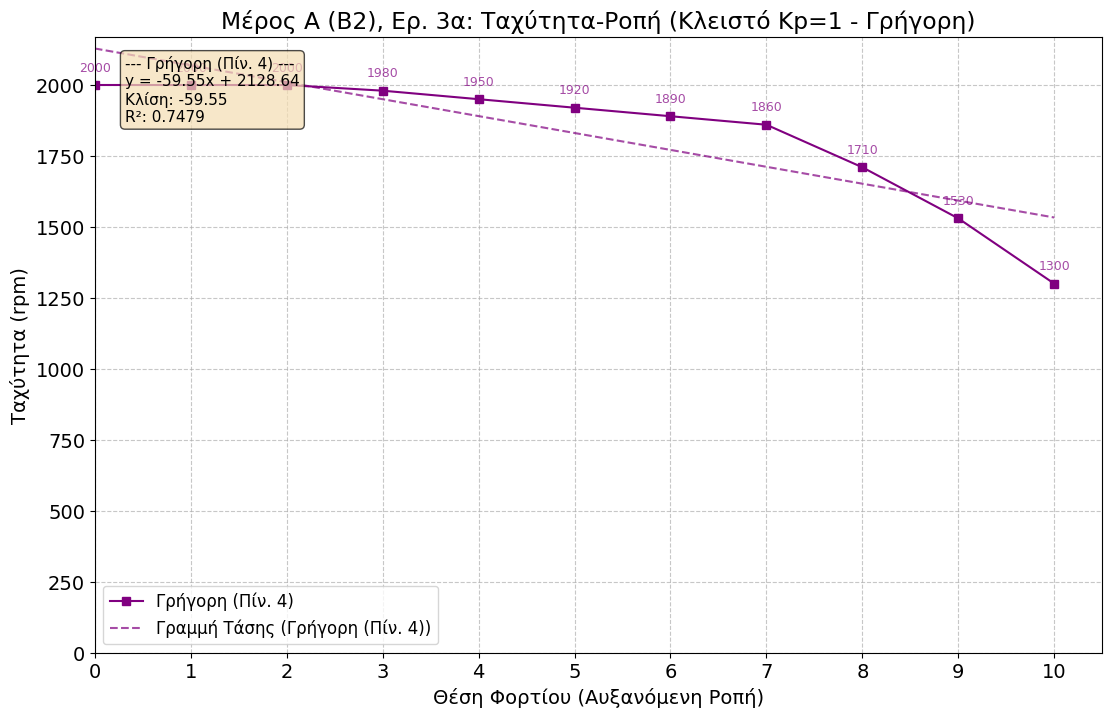

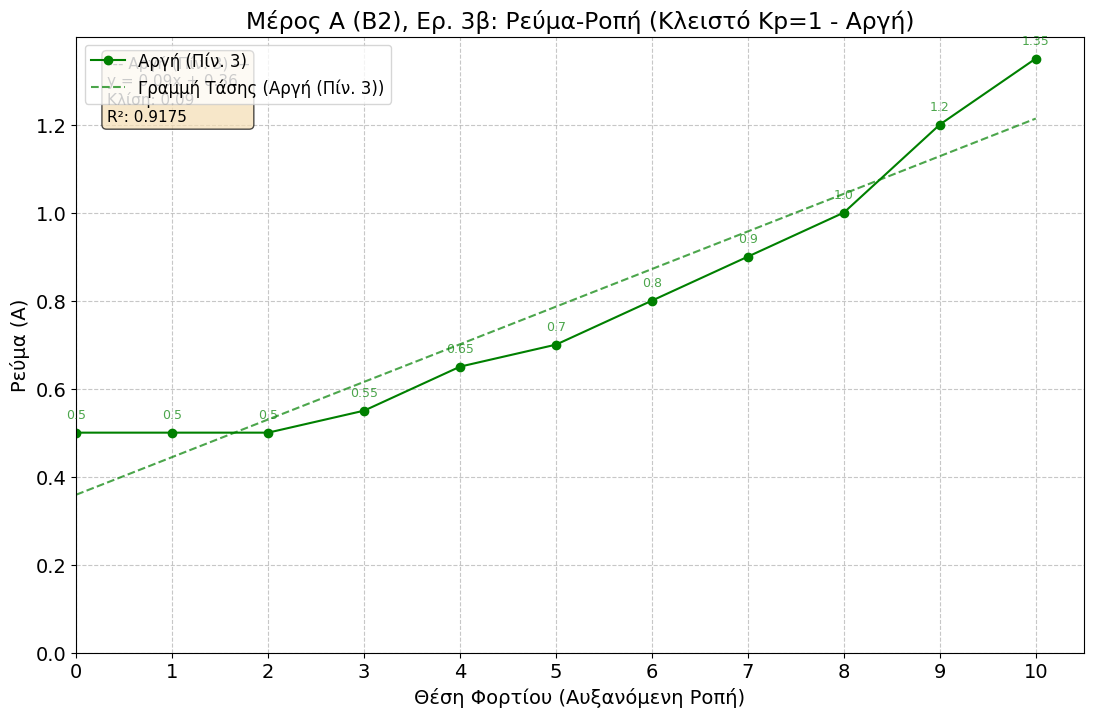

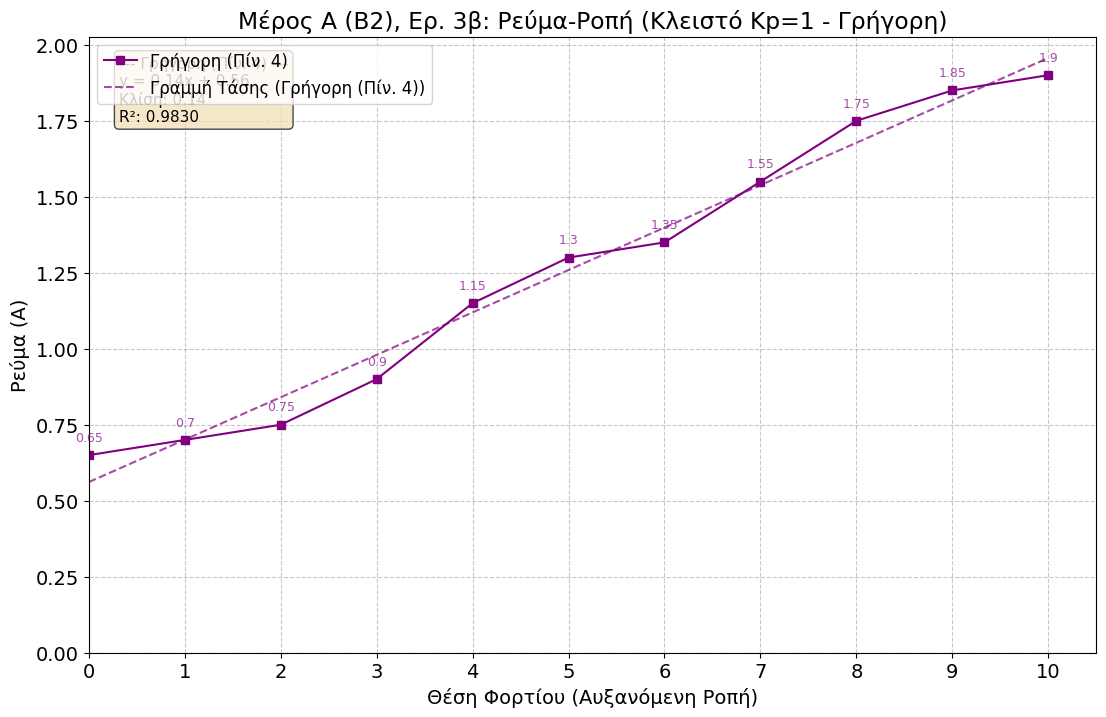

--- Μέρος Α, Ερώτημα 4 (Σύγκριση Ταχύτητας, Αργή) ---


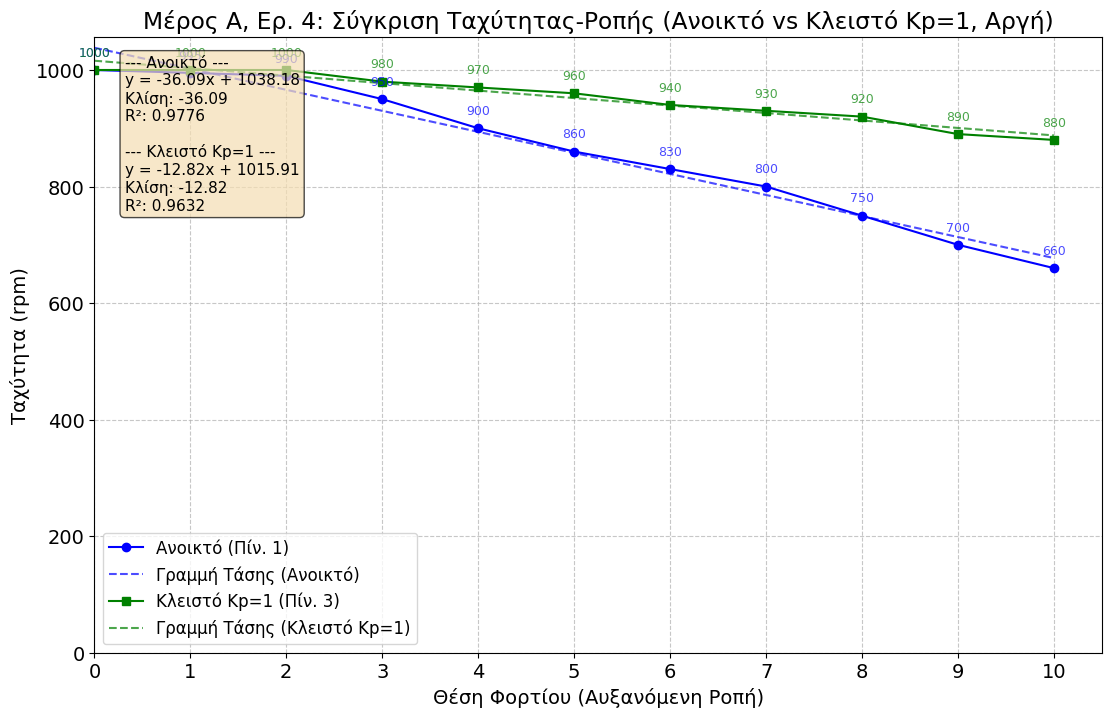

--- Μέρος Α, Ερώτημα 5 (Σύγκριση Ταχύτητας, Γρήγορη) ---


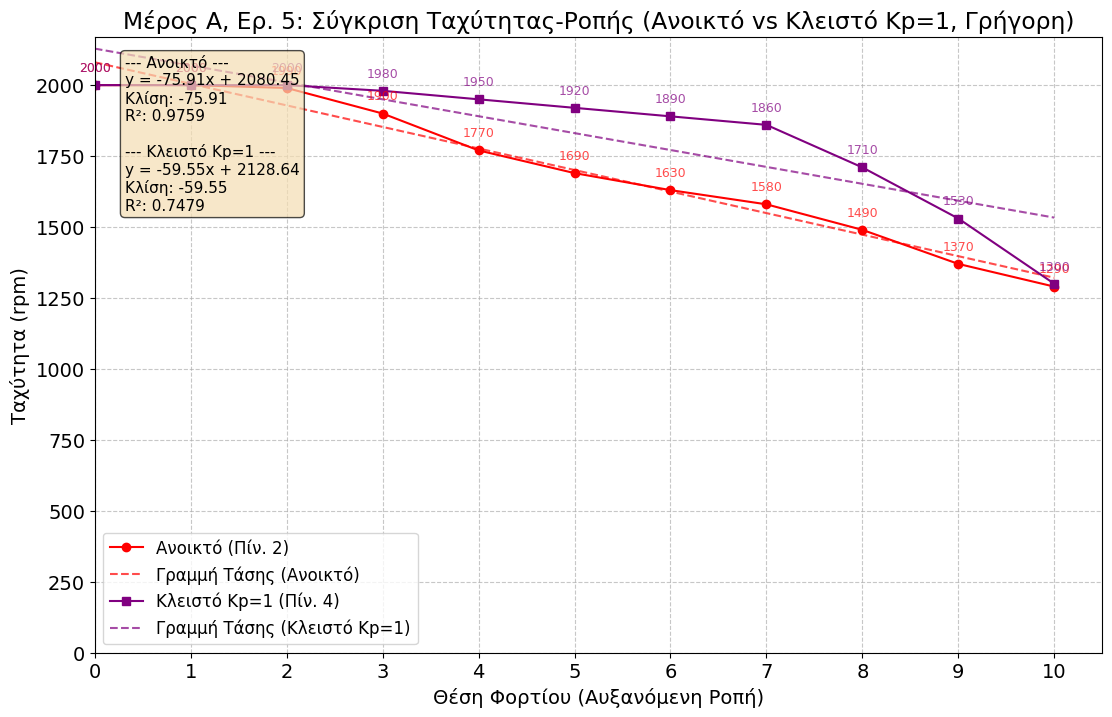

--- Μέρος Α, Ερώτημα 6 (Σύγκριση Ρεύματος, Αργή) ---


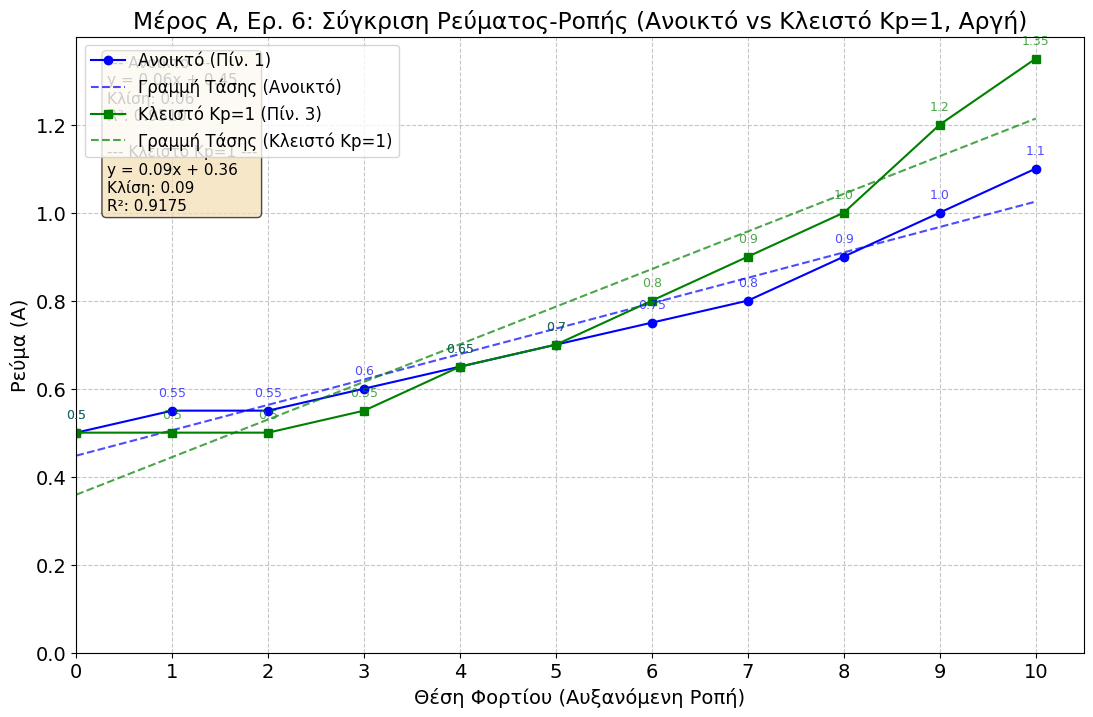

--- Μέρος Α, Ερώτημα 7 (Σύγκριση Ρεύματος, Γρήγορη) ---


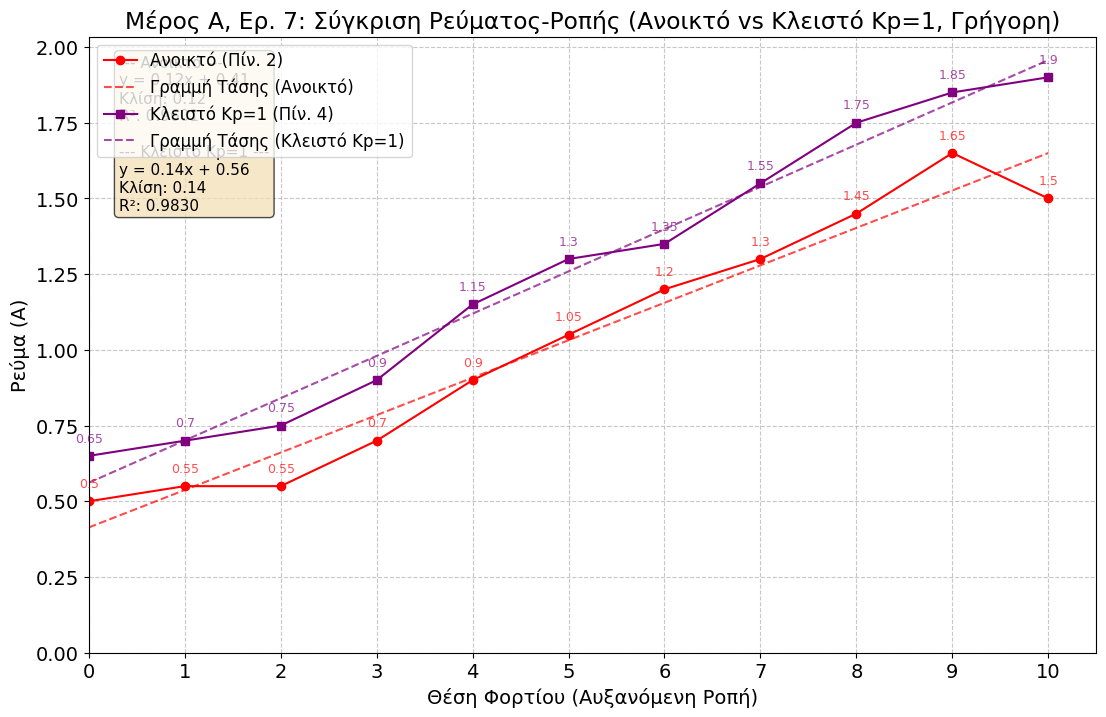

--- Μέρος Β, Ερώτημα 4 (Από Πίνακες 6 & 7) ---


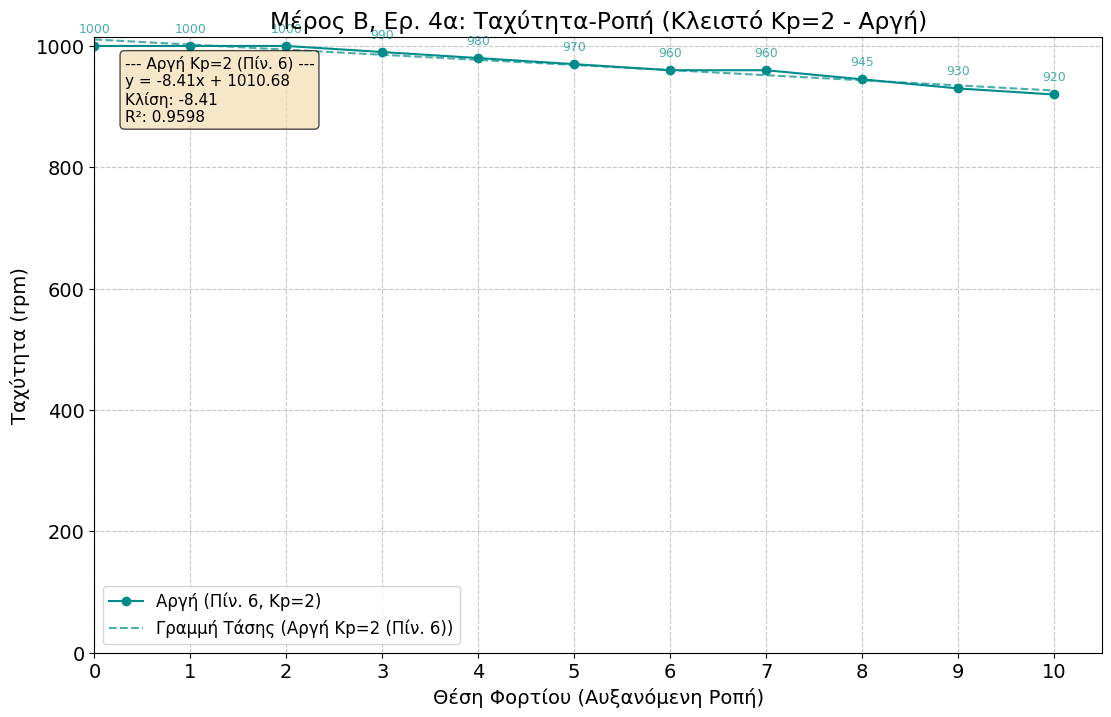

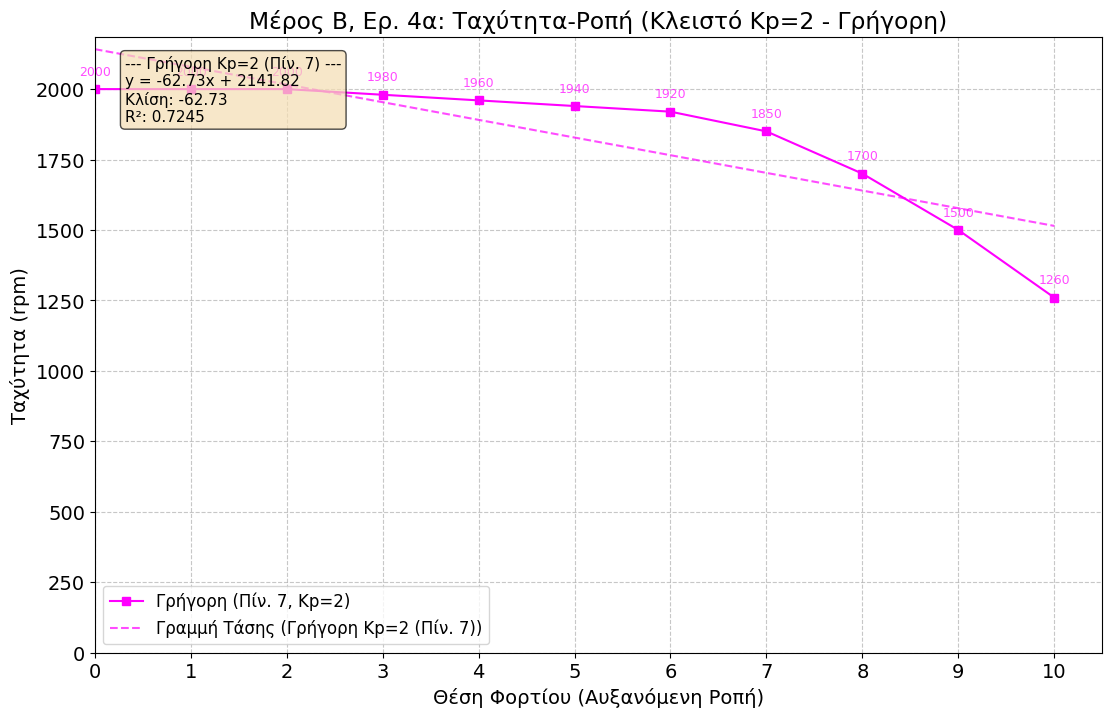

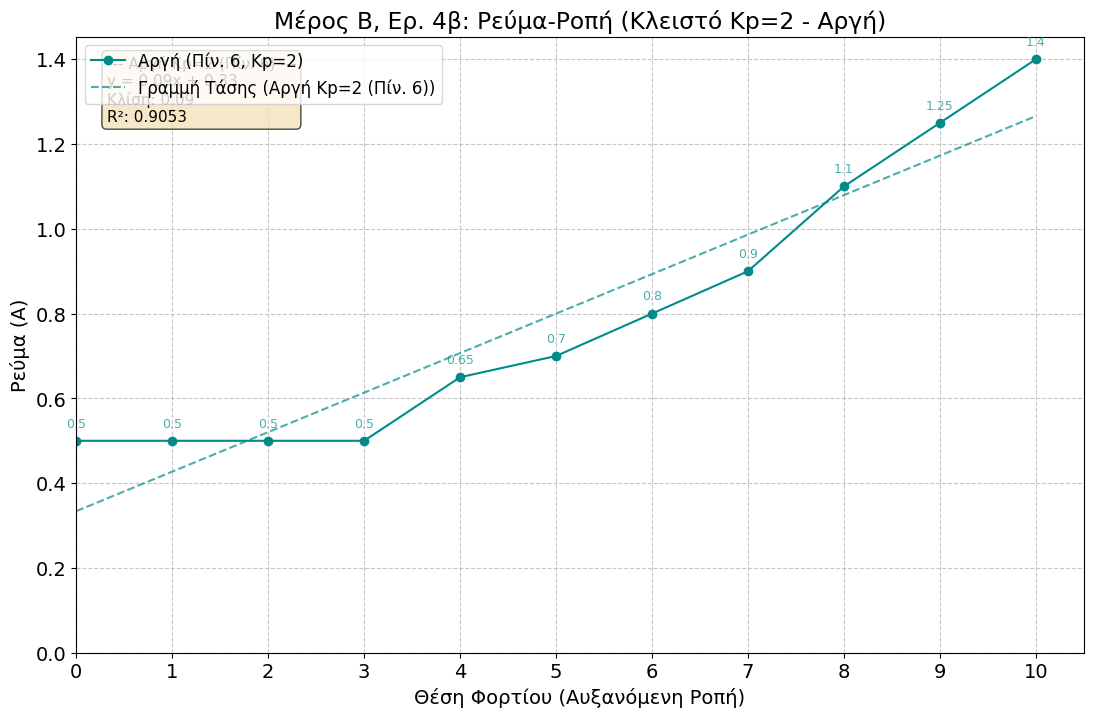

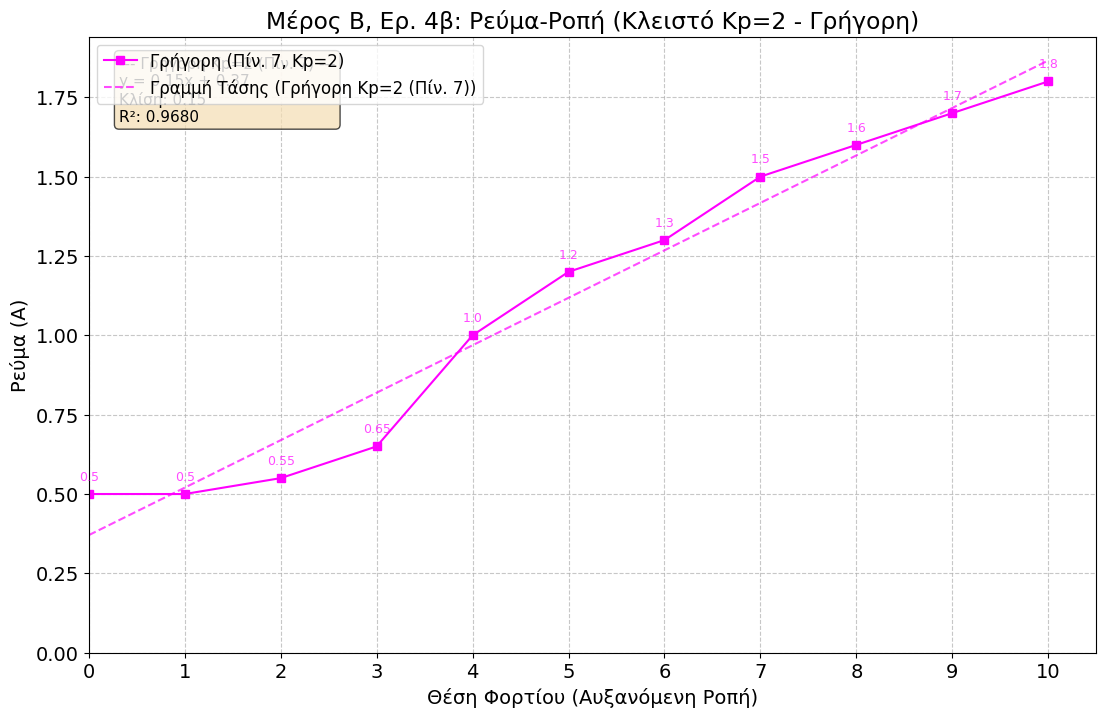

--- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Αργή) ---


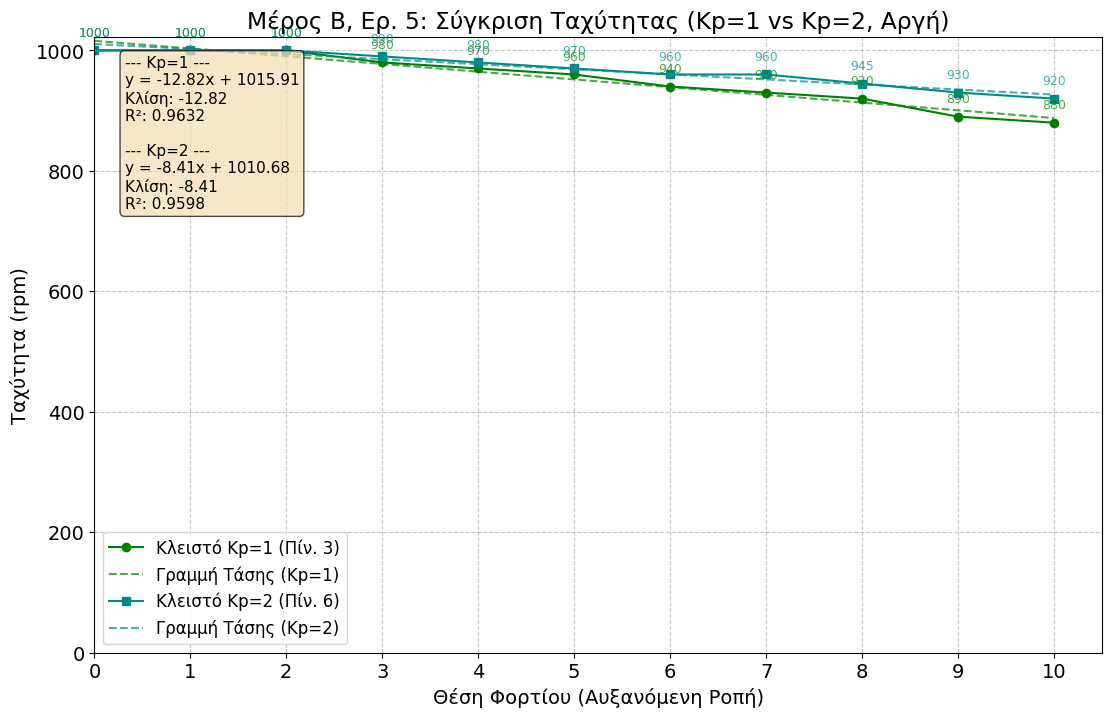

--- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Γρήγορη) ---


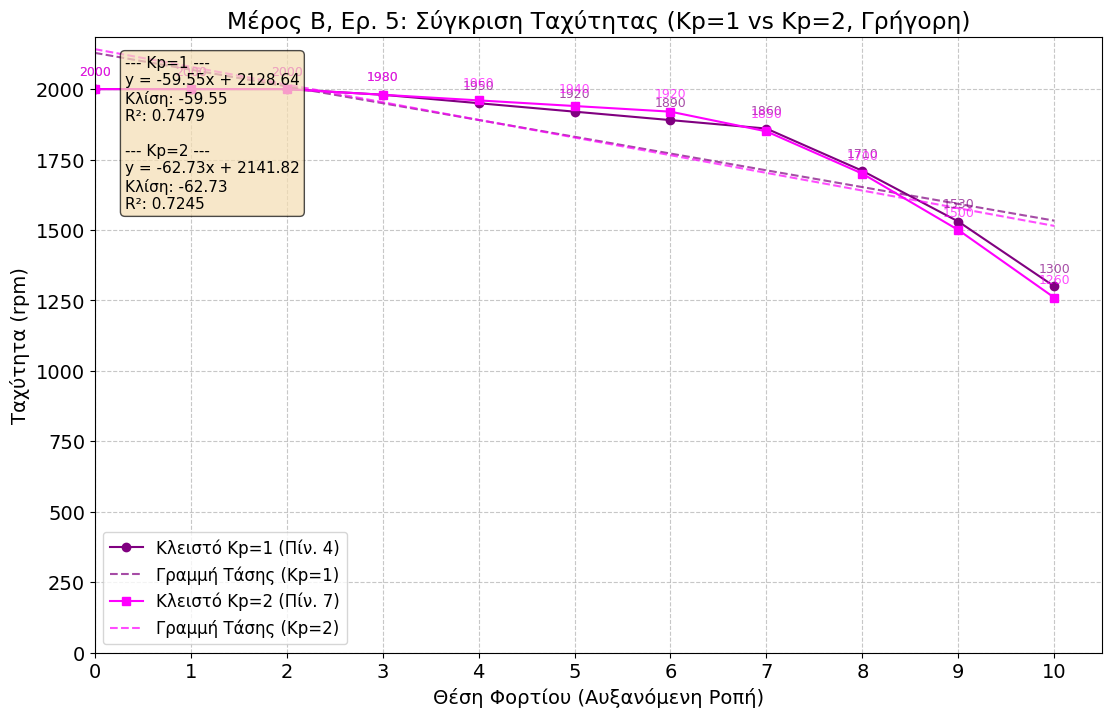

--- Μέρος Β, Ερώτημα 6 (Επίδραση Kp) ---


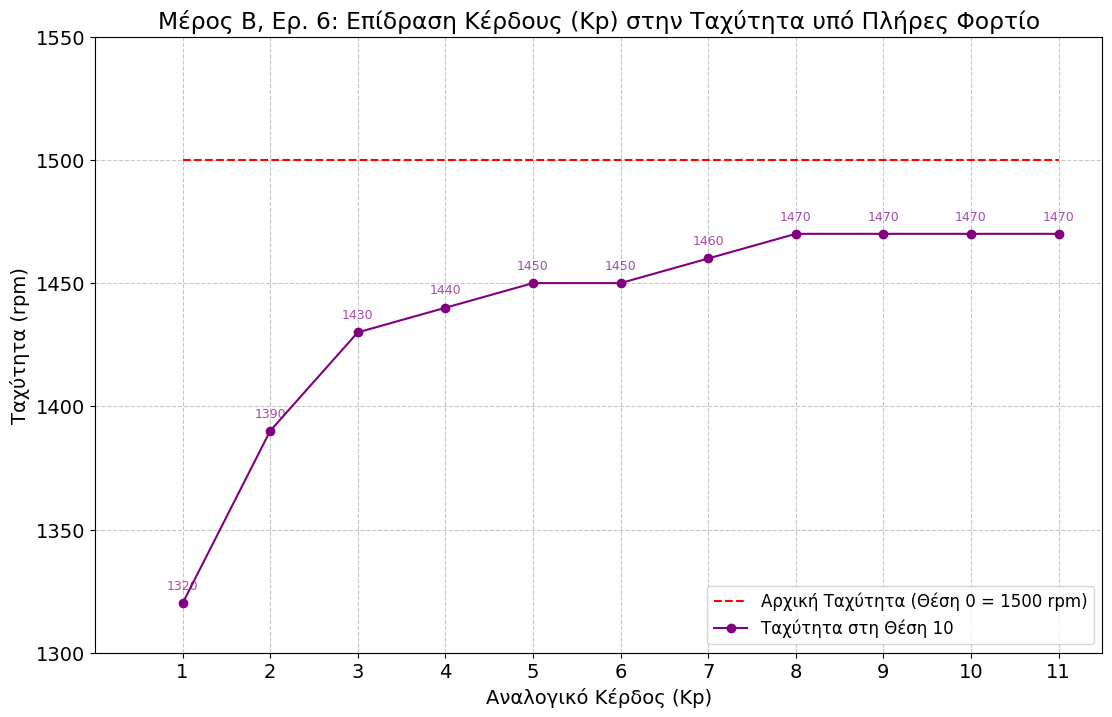


--- ΟΛΕΣ ΟΙ ΓΡΑΦΙΚΕΣ ΠΑΡΑΣΤΑΣΕΙΣ ΔΗΜΙΟΥΡΓΗΘΗΚΑΝ ---


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats  # Για τη γραμμική παλινδρόμηση

# --- Βοηθητική Συνάρτηση για Προσθήκη Τιμών ---
def add_value_labels(ax, x_data, y_data, color='black'):
    """
    Προσθέτει ετικέτες με τις τιμές y πάνω από κάθε σημείο (x, y).
    """
    for x, y in zip(x_data, y_data):
        ax.annotate(f'{y}',  # Το κείμενο της ετικέτας
                    (x, y),  # Το σημείο (x,y)
                    textcoords="offset points",  # Ορίζουμε το offset σε pixels
                    xytext=(0, 10),  # 10 pixels κάθετα (πάνω)
                    ha='center',  # Οριζόντια στοίχιση
                    fontsize=9,
                    color=color,
                    alpha=0.7)

# --- Βοηθητική Συνάρτηση για Παλινδρόμηση & Κείμενο ---
def get_regression_stats_and_plot(ax, x_data, y_data, label, color):
    """
    Υπολογίζει τη γραμμική παλινδρόμηση, σχεδιάζει τη γραμμή τάσης,
    και επιστρέφει ένα string με τα στατιστικά (Κλίση, R²).
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    r_squared = r_value**2

    x_fit = np.array([np.min(x_data), np.max(x_data)])
    y_fit = slope * x_fit + intercept

    ax.plot(x_fit, y_fit, '--', color=color, alpha=0.7,
            label=f'Γραμμή Τάσης ({label})')

    textstr = (
        f"--- {label} ---\n"
        f"y = {slope:.2f}x + {intercept:.2f}\n"
        f"Κλίση: {slope:.2f}\n"
        f"R²: {r_squared:.4f}"
    )
    return textstr

# --- Γενικές Ρυθμίσεις Γραφημάτων ---
mpl.rcParams['figure.figsize'] = (13, 8)  # Μέγεθος γραφημάτων
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.alpha'] = 0.7
mpl.rcParams['legend.fontsize'] = 12
TEXT_BOX_PROPS = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# ==============================================================================
# ΦΟΡΤΩΣΗ ΔΕΔΟΜΕΝΩΝ (Από ΥΠΟΔΕΙΓΜΑ ΕΡΓΑΣΙΑΣ 1111_25.pdf)
# ==============================================================================
load_position = np.arange(0, 11)
speed_p1 = np.array([1000, 995, 990, 950, 900, 860, 830, 800, 750, 700, 660])
current_p1 = np.array([0.50, 0.55, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.90, 1.00, 1.10])
speed_p2 = np.array([2000, 2000, 1990, 1900, 1770, 1690, 1630, 1580, 1490, 1370, 1290])
current_p2 = np.array([0.50, 0.55, 0.55, 0.70, 0.90, 1.05, 1.20, 1.30, 1.45, 1.65, 1.50])
speed_p3 = np.array([1000, 1000, 1000, 980, 970, 960, 940, 930, 920, 890, 880])
current_p3 = np.array([0.50, 0.50, 0.50, 0.55, 0.65, 0.70, 0.80, 0.90, 1.00, 1.20, 1.35])
speed_p4 = np.array([2000, 2000, 2000, 1980, 1950, 1920, 1890, 1860, 1710, 1530, 1300])
current_p4 = np.array([0.65, 0.70, 0.75, 0.90, 1.15, 1.30, 1.35, 1.55, 1.75, 1.85, 1.90])
speed_p6 = np.array([1000, 1000, 1000, 990, 980, 970, 960, 960, 945, 930, 920])
current_p6 = np.array([0.50, 0.50, 0.50, 0.50, 0.65, 0.70, 0.80, 0.90, 1.10, 1.25, 1.40])
speed_p7 = np.array([2000, 2000, 2000, 1980, 1960, 1940, 1920, 1850, 1700, 1500, 1260])
current_p7 = np.array([0.50, 0.50, 0.55, 0.65, 1.00, 1.20, 1.30, 1.50, 1.60, 1.70, 1.80])
kp_values = np.arange(1, 12)
speed_at_load0 = np.full_like(kp_values, 1500)
speed_at_load10 = np.array([1320, 1390, 1430, 1440, 1450, 1450, 1460, 1470, 1470, 1470, 1470])

# ==============================================================================
# ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΗΜΑΤΩΝ (ΒΑΣΕΙ ΥΠΟΔΕΙΓΜΑΤΟΣ)
# ==============================================================================

# --- Μέρος Α, Ερώτημα 3 (Από Πίνακες 1 & 2) ---
print("--- Μέρος Α, Ερώτημα 3 (Από Πίνακες 1 & 2) ---")

# --- Γράφημα 3α (Ταχύτητα-Ροπή, Ανοικτό - ΑΡΓΗ) ---
fig3a_1, ax3a_1 = plt.subplots()
ax3a_1.plot(load_position, speed_p1, 'o-', color='blue', label='Αργή (Πίν. 1)')
add_value_labels(ax3a_1, load_position, speed_p1, color='blue')
text_p1 = get_regression_stats_and_plot(ax3a_1, load_position, speed_p1, 'Αργή (Πίν. 1)', 'blue')
ax3a_1.text(0.03, 0.97, text_p1, transform=ax3a_1.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax3a_1.set_title('Μέρος Α, Ερ. 3α: Ταχύτητα-Ροπή (Ανοικτό Σύστημα - Αργή)')
ax3a_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax3a_1.set_ylabel('Ταχύτητα (rpm)')
ax3a_1.legend(loc='lower left')
ax3a_1.set_xticks(load_position)
ax3a_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax3a_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 3α (Ταχύτητα-Ροπή, Ανοικτό - ΓΡΗΓΟΡΗ) ---
fig3a_2, ax3a_2 = plt.subplots()
ax3a_2.plot(load_position, speed_p2, 's-', color='red', label='Γρήγορη (Πίν. 2)')
add_value_labels(ax3a_2, load_position, speed_p2, color='red')
text_p2 = get_regression_stats_and_plot(ax3a_2, load_position, speed_p2, 'Γρήγορη (Πίν. 2)', 'red')
ax3a_2.text(0.03, 0.97, text_p2, transform=ax3a_2.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax3a_2.set_title('Μέρος Α, Ερ. 3α: Ταχύτητα-Ροπή (Ανοικτό Σύστημα - Γρήγορη)')
ax3a_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax3a_2.set_ylabel('Ταχύτητα (rpm)')
ax3a_2.legend(loc='lower left')
ax3a_2.set_xticks(load_position)
ax3a_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax3a_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 3β (Ρεύμα-Ροπή, Ανοικτό - ΑΡΓΗ) ---
fig3b_1, ax3b_1 = plt.subplots()
ax3b_1.plot(load_position, current_p1, 'o-', color='blue', label='Αργή (Πίν. 1)')
add_value_labels(ax3b_1, load_position, current_p1, color='blue')
text_p1 = get_regression_stats_and_plot(ax3b_1, load_position, current_p1, 'Αργή (Πίν. 1)', 'blue')
ax3b_1.text(0.03, 0.97, text_p1, transform=ax3b_1.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax3b_1.set_title('Μέρος Α, Ερ. 3β: Ρεύμα-Ροπή (Ανοικτό Σύστημα - Αργή)')
ax3b_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax3b_1.set_ylabel('Ρεύμα (A)')
ax3b_1.legend(loc='upper left')
ax3b_1.set_xticks(load_position)
ax3b_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax3b_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 3β (Ρεύμα-Ροπή, Ανοικτό - ΓΡΗΓΟΡΗ) ---
fig3b_2, ax3b_2 = plt.subplots()
ax3b_2.plot(load_position, current_p2, 's-', color='red', label='Γρήγορη (Πίν. 2)')
add_value_labels(ax3b_2, load_position, current_p2, color='red')
text_p2 = get_regression_stats_and_plot(ax3b_2, load_position, current_p2, 'Γρήγορη (Πίν. 2)', 'red')
ax3b_2.text(0.03, 0.97, text_p2, transform=ax3b_2.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax3b_2.set_title('Μέρος Α, Ερ. 3β: Ρεύμα-Ροπή (Ανοικτό Σύστημα - Γρήγορη)')
ax3b_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax3b_2.set_ylabel('Ρεύμα (A)')
ax3b_2.legend(loc='upper left')
ax3b_2.set_xticks(load_position)
ax3b_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax3b_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Α (Β2), Ερώτημα 3 (Από Πίνακες 3 & 4) ---
print("--- Μέρος Α (Β2), Ερώτημα 3 (Από Πίνακες 3 & 4) ---")

# --- Γράφημα (Β2) 3α (Ταχύτητα-Ροπή, Κλειστό Kp=1 - ΑΡΓΗ) ---
figB2_3a_1, axB2_3a_1 = plt.subplots()
axB2_3a_1.plot(load_position, speed_p3, 'o-', color='green', label='Αργή (Πίν. 3)')
add_value_labels(axB2_3a_1, load_position, speed_p3, color='green')
text_p3 = get_regression_stats_and_plot(axB2_3a_1, load_position, speed_p3, 'Αργή (Πίν. 3)', 'green')
axB2_3a_1.text(0.03, 0.97, text_p3, transform=axB2_3a_1.transAxes,
               fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB2_3a_1.set_title('Μέρος Α (Β2), Ερ. 3α: Ταχύτητα-Ροπή (Κλειστό Kp=1 - Αργή)')
axB2_3a_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB2_3a_1.set_ylabel('Ταχύτητα (rpm)')
axB2_3a_1.legend(loc='lower left')
axB2_3a_1.set_xticks(load_position)
axB2_3a_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB2_3a_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα (Β2) 3α (Ταχύτητα-Ροπή, Κλειστό Kp=1 - ΓΡΗΓΟΡΗ) ---
figB2_3a_2, axB2_3a_2 = plt.subplots()
axB2_3a_2.plot(load_position, speed_p4, 's-', color='purple', label='Γρήγορη (Πίν. 4)')
add_value_labels(axB2_3a_2, load_position, speed_p4, color='purple')
text_p4 = get_regression_stats_and_plot(axB2_3a_2, load_position, speed_p4, 'Γρήγορη (Πίν. 4)', 'purple')
axB2_3a_2.text(0.03, 0.97, text_p4, transform=axB2_3a_2.transAxes,
               fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB2_3a_2.set_title('Μέρος Α (Β2), Ερ. 3α: Ταχύτητα-Ροπή (Κλειστό Kp=1 - Γρήγορη)')
axB2_3a_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB2_3a_2.set_ylabel('Ταχύτητα (rpm)')
axB2_3a_2.legend(loc='lower left')
axB2_3a_2.set_xticks(load_position)
axB2_3a_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB2_3a_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα (Β2) 3β (Ρεύμα-Ροπή, Κλειστό Kp=1 - ΑΡΓΗ) ---
figB2_3b_1, axB2_3b_1 = plt.subplots()
axB2_3b_1.plot(load_position, current_p3, 'o-', color='green', label='Αργή (Πίν. 3)')
add_value_labels(axB2_3b_1, load_position, current_p3, color='green')
text_p3 = get_regression_stats_and_plot(axB2_3b_1, load_position, current_p3, 'Αργή (Πίν. 3)', 'green')
axB2_3b_1.text(0.03, 0.97, text_p3, transform=axB2_3b_1.transAxes,
               fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB2_3b_1.set_title('Μέρος Α (Β2), Ερ. 3β: Ρεύμα-Ροπή (Κλειστό Kp=1 - Αργή)')
axB2_3b_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB2_3b_1.set_ylabel('Ρεύμα (A)')
axB2_3b_1.legend(loc='upper left')
axB2_3b_1.set_xticks(load_position)
axB2_3b_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB2_3b_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα (Β2) 3β (Ρεύμα-Ροπή, Κλειστό Kp=1 - ΓΡΗΓΟΡΗ) ---
figB2_3b_2, axB2_3b_2 = plt.subplots()
axB2_3b_2.plot(load_position, current_p4, 's-', color='purple', label='Γρήγορη (Πίν. 4)')
add_value_labels(axB2_3b_2, load_position, current_p4, color='purple')
text_p4 = get_regression_stats_and_plot(axB2_3b_2, load_position, current_p4, 'Γρήγορη (Πίν. 4)', 'purple')
axB2_3b_2.text(0.03, 0.97, text_p4, transform=axB2_3b_2.transAxes,
               fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB2_3b_2.set_title('Μέρος Α (Β2), Ερ. 3β: Ρεύμα-Ροπή (Κλειστό Kp=1 - Γρήγορη)')
axB2_3b_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB2_3b_2.set_ylabel('Ρεύμα (A)')
axB2_3b_2.legend(loc='upper left')
axB2_3b_2.set_xticks(load_position)
axB2_3b_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB2_3b_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()


# --- Μέρος Α, Ερώτημα 4 (Σύγκριση Ταχύτητας, Αργή) ---
print("--- Μέρος Α, Ερώτημα 4 (Σύγκριση Ταχύτητας, Αργή) ---")
fig4, ax4 = plt.subplots()
textbox_content = []
# Ανοικτό (Πίν 1)
ax4.plot(load_position, speed_p1, 'o-', color='blue', label='Ανοικτό (Πίν. 1)')
add_value_labels(ax4, load_position, speed_p1, color='blue')
text_p1 = get_regression_stats_and_plot(ax4, load_position, speed_p1, 'Ανοικτό', 'blue')
textbox_content.append(text_p1)
# Κλειστό Kp=1 (Πίν 3)
ax4.plot(load_position, speed_p3, 's-', color='green', label='Κλειστό Kp=1 (Πίν. 3)')
add_value_labels(ax4, load_position, speed_p3, color='green')
text_p3 = get_regression_stats_and_plot(ax4, load_position, speed_p3, 'Κλειστό Kp=1', 'green')
textbox_content.append(text_p3)
ax4.text(0.03, 0.97, "\n\n".join(textbox_content), transform=ax4.transAxes,
         fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax4.set_title('Μέρος Α, Ερ. 4: Σύγκριση Ταχύτητας-Ροπής (Ανοικτό vs Κλειστό Kp=1, Αργή)')
ax4.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax4.set_ylabel('Ταχύτητα (rpm)')
ax4.legend(loc='lower left')
ax4.set_xticks(load_position)
ax4.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax4.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Α, Ερώτημα 5 (Σύγκριση Ταχύτητας, Γρήγορη) ---
print("--- Μέρος Α, Ερώτημα 5 (Σύγκριση Ταχύτητας, Γρήγορη) ---")
fig5, ax5 = plt.subplots()
textbox_content = []
# Ανοικτό (Πίν 2)
ax5.plot(load_position, speed_p2, 'o-', color='red', label='Ανοικτό (Πίν. 2)')
add_value_labels(ax5, load_position, speed_p2, color='red')
text_p2 = get_regression_stats_and_plot(ax5, load_position, speed_p2, 'Ανοικτό', 'red')
textbox_content.append(text_p2)
# Κλειστό Kp=1 (Πίν 4)
ax5.plot(load_position, speed_p4, 's-', color='purple', label='Κλειστό Kp=1 (Πίν. 4)')
add_value_labels(ax5, load_position, speed_p4, color='purple')
text_p4 = get_regression_stats_and_plot(ax5, load_position, speed_p4, 'Κλειστό Kp=1', 'purple')
textbox_content.append(text_p4)
ax5.text(0.03, 0.97, "\n\n".join(textbox_content), transform=ax5.transAxes,
         fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax5.set_title('Μέρος Α, Ερ. 5: Σύγκριση Ταχύτητας-Ροπής (Ανοικτό vs Κλειστό Kp=1, Γρήγορη)')
ax5.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax5.set_ylabel('Ταχύτητα (rpm)')
ax5.legend(loc='lower left')
ax5.set_xticks(load_position)
ax5.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax5.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Α, Ερώτημα 6 (Σύγκριση Ρεύματος, Αργή) ---
print("--- Μέρος Α, Ερώτημα 6 (Σύγκριση Ρεύματος, Αργή) ---")
fig6, ax6 = plt.subplots()
textbox_content = []
ax6.plot(load_position, current_p1, 'o-', color='blue', label='Ανοικτό (Πίν. 1)')
add_value_labels(ax6, load_position, current_p1, color='blue')
text_p1 = get_regression_stats_and_plot(ax6, load_position, current_p1, 'Ανοικτό', 'blue')
textbox_content.append(text_p1)
ax6.plot(load_position, current_p3, 's-', color='green', label='Κλειστό Kp=1 (Πίν. 3)')
add_value_labels(ax6, load_position, current_p3, color='green')
text_p3 = get_regression_stats_and_plot(ax6, load_position, current_p3, 'Κλειστό Kp=1', 'green')
textbox_content.append(text_p3)
ax6.text(0.03, 0.97, "\n\n".join(textbox_content), transform=ax6.transAxes,
         fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax6.set_title('Μέρος Α, Ερ. 6: Σύγκριση Ρεύματος-Ροπής (Ανοικτό vs Κλειστό Kp=1, Αργή)')
ax6.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax6.set_ylabel('Ρεύμα (A)')
ax6.legend(loc='upper left')
ax6.set_xticks(load_position)
ax6.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax6.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Α, Ερώτημα 7 (Σύγκριση Ρεύματος, Γρήγορη) ---
print("--- Μέρος Α, Ερώτημα 7 (Σύγκριση Ρεύματος, Γρήγορη) ---")
fig7, ax7 = plt.subplots()
textbox_content = []
ax7.plot(load_position, current_p2, 'o-', color='red', label='Ανοικτό (Πίν. 2)')
add_value_labels(ax7, load_position, current_p2, color='red')
text_p2 = get_regression_stats_and_plot(ax7, load_position, current_p2, 'Ανοικτό', 'red')
textbox_content.append(text_p2)
ax7.plot(load_position, current_p4, 's-', color='purple', label='Κλειστό Kp=1 (Πίν. 4)')
add_value_labels(ax7, load_position, current_p4, color='purple')
text_p4 = get_regression_stats_and_plot(ax7, load_position, current_p4, 'Κλειστό Kp=1', 'purple')
textbox_content.append(text_p4)
ax7.text(0.03, 0.97, "\n\n".join(textbox_content), transform=ax7.transAxes,
         fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
ax7.set_title('Μέρος Α, Ερ. 7: Σύγκριση Ρεύματος-Ροπής (Ανοικτό vs Κλειστό Kp=1, Γρήγορη)')
ax7.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
ax7.set_ylabel('Ρεύμα (A)')
ax7.legend(loc='upper left')
ax7.set_xticks(load_position)
ax7.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
ax7.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Β, Ερώτημα 4 (Από Πίνακες 6 & 7) ---
print("--- Μέρος Β, Ερώτημα 4 (Από Πίνακες 6 & 7) ---")

# --- Γράφημα 4α (Ταχύτητα-Ροπή, Kp=2 - ΑΡΓΗ) ---
figB_4a_1, axB_4a_1 = plt.subplots()
axB_4a_1.plot(load_position, speed_p6, 'o-', color='darkcyan', label='Αργή (Πίν. 6, Kp=2)')
add_value_labels(axB_4a_1, load_position, speed_p6, color='darkcyan')
text_p6 = get_regression_stats_and_plot(axB_4a_1, load_position, speed_p6, 'Αργή Kp=2 (Πίν. 6)', 'darkcyan')
axB_4a_1.text(0.03, 0.97, text_p6, transform=axB_4a_1.transAxes,
              fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_4a_1.set_title('Μέρος Β, Ερ. 4α: Ταχύτητα-Ροπή (Κλειστό Kp=2 - Αργή)')
axB_4a_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_4a_1.set_ylabel('Ταχύτητα (rpm)')
axB_4a_1.legend(loc='lower left')
axB_4a_1.set_xticks(load_position)
axB_4a_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_4a_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 4α (Ταχύτητα-Ροπή, Kp=2 - ΓΡΗΓΟΡΗ) ---
figB_4a_2, axB_4a_2 = plt.subplots()
axB_4a_2.plot(load_position, speed_p7, 's-', color='magenta', label='Γρήγορη (Πίν. 7, Kp=2)')
add_value_labels(axB_4a_2, load_position, speed_p7, color='magenta')
text_p7 = get_regression_stats_and_plot(axB_4a_2, load_position, speed_p7, 'Γρήγορη Kp=2 (Πίν. 7)', 'magenta')
axB_4a_2.text(0.03, 0.97, text_p7, transform=axB_4a_2.transAxes,
              fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_4a_2.set_title('Μέρος Β, Ερ. 4α: Ταχύτητα-Ροπή (Κλειστό Kp=2 - Γρήγορη)')
axB_4a_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_4a_2.set_ylabel('Ταχύτητα (rpm)')
axB_4a_2.legend(loc='lower left')
axB_4a_2.set_xticks(load_position)
axB_4a_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_4a_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 4β (Ρεύμα-Ροπή, Kp=2 - ΑΡΓΗ) ---
figB_4b_1, axB_4b_1 = plt.subplots()
axB_4b_1.plot(load_position, current_p6, 'o-', color='darkcyan', label='Αργή (Πίν. 6, Kp=2)')
add_value_labels(axB_4b_1, load_position, current_p6, color='darkcyan')
text_p6 = get_regression_stats_and_plot(axB_4b_1, load_position, current_p6, 'Αργή Kp=2 (Πίν. 6)', 'darkcyan')
axB_4b_1.text(0.03, 0.97, text_p6, transform=axB_4b_1.transAxes,
              fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_4b_1.set_title('Μέρος Β, Ερ. 4β: Ρεύμα-Ροπή (Κλειστό Kp=2 - Αργή)')
axB_4b_1.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_4b_1.set_ylabel('Ρεύμα (A)')
axB_4b_1.legend(loc='upper left')
axB_4b_1.set_xticks(load_position)
axB_4b_1.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_4b_1.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Γράφημα 4β (Ρεύμα-Ροπή, Kp=2 - ΓΡΗΓΟΡΗ) ---
figB_4b_2, axB_4b_2 = plt.subplots()
axB_4b_2.plot(load_position, current_p7, 's-', color='magenta', label='Γρήγορη (Πίν. 7, Kp=2)')
add_value_labels(axB_4b_2, load_position, current_p7, color='magenta')
text_p7 = get_regression_stats_and_plot(axB_4b_2, load_position, current_p7, 'Γρήγορη Kp=2 (Πίν. 7)', 'magenta')
axB_4b_2.text(0.03, 0.97, text_p7, transform=axB_4b_2.transAxes,
              fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_4b_2.set_title('Μέρος Β, Ερ. 4β: Ρεύμα-Ροπή (Κλειστό Kp=2 - Γρήγορη)')
axB_4b_2.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_4b_2.set_ylabel('Ρεύμα (A)')
axB_4b_2.legend(loc='upper left')
axB_4b_2.set_xticks(load_position)
axB_4b_2.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_4b_2.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Αργή) ---
print("--- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Αργή) ---")
figB_5a, axB_5a = plt.subplots()
textbox_content = []
# Kp=1 (Πίν 3)
axB_5a.plot(load_position, speed_p3, 'o-', color='green', label='Κλειστό Kp=1 (Πίν. 3)')
add_value_labels(axB_5a, load_position, speed_p3, color='green')
text_p3 = get_regression_stats_and_plot(axB_5a, load_position, speed_p3, 'Kp=1', 'green')
textbox_content.append(text_p3)
# Kp=2 (Πίν 6)
axB_5a.plot(load_position, speed_p6, 's-', color='darkcyan', label='Κλειστό Kp=2 (Πίν. 6)')
add_value_labels(axB_5a, load_position, speed_p6, color='darkcyan')
text_p6 = get_regression_stats_and_plot(axB_5a, load_position, speed_p6, 'Kp=2', 'darkcyan')
textbox_content.append(text_p6)
axB_5a.text(0.03, 0.97, "\n\n".join(textbox_content), transform=axB_5a.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_5a.set_title('Μέρος Β, Ερ. 5: Σύγκριση Ταχύτητας (Kp=1 vs Kp=2, Αργή)')
axB_5a.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_5a.set_ylabel('Ταχύτητα (rpm)')
axB_5a.legend(loc='lower left')
axB_5a.set_xticks(load_position)
axB_5a.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_5a.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()

# --- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Γρήγορη) ---
print("--- Μέρος Β, Ερώτημα 5 (Σύγκριση Kp=1 vs Kp=2, Γρήγορη) ---")
figB_5b, axB_5b = plt.subplots()
textbox_content = []
# Kp=1 (Πίν 4)
axB_5b.plot(load_position, speed_p4, 'o-', color='purple', label='Κλειστό Kp=1 (Πίν. 4)')
add_value_labels(axB_5b, load_position, speed_p4, color='purple')
text_p4 = get_regression_stats_and_plot(axB_5b, load_position, speed_p4, 'Kp=1', 'purple')
textbox_content.append(text_p4)
# Kp=2 (Πίν 7)
axB_5b.plot(load_position, speed_p7, 's-', color='magenta', label='Κλειστό Kp=2 (Πίν. 7)')
add_value_labels(axB_5b, load_position, speed_p7, color='magenta')
text_p7 = get_regression_stats_and_plot(axB_5b, load_position, speed_p7, 'Kp=2', 'magenta')
textbox_content.append(text_p7)
axB_5b.text(0.03, 0.97, "\n\n".join(textbox_content), transform=axB_5b.transAxes,
            fontsize=11, verticalalignment='top', bbox=TEXT_BOX_PROPS)
axB_5b.set_title('Μέρος Β, Ερ. 5: Σύγκριση Ταχύτητας (Kp=1 vs Kp=2, Γρήγορη)')
axB_5b.set_xlabel('Θέση Φορτίου (Αυξανόμενη Ροπή)')
axB_5b.set_ylabel('Ταχύτητα (rpm)')
axB_5b.legend(loc='lower left')
axB_5b.set_xticks(load_position)
axB_5b.set_xlim(left=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
axB_5b.set_ylim(bottom=0)  # <-- ΤΡΟΠΟΠΟΙΗΣΗ
plt.show()


# --- Μέρος Β, Ερώτημα 6 (Επίδραση Kp) ---
print("--- Μέρος Β, Ερώτημα 6 (Επίδραση Kp) ---")
figB_6, axB_6 = plt.subplots()
axB_6.plot(kp_values, speed_at_load0, 'r--', label='Αρχική Ταχύτητα (Θέση 0 = 1500 rpm)')
axB_6.plot(kp_values, speed_at_load10, 'o-', color='purple', label='Ταχύτητα στη Θέση 10')
add_value_labels(axB_6, kp_values, speed_at_load10, color='purple')
axB_6.set_title('Μέρος Β, Ερ. 6: Επίδραση Κέρδους (Kp) στην Ταχύτητα υπό Πλήρες Φορτίο')
axB_6.set_xlabel('Αναλογικό Κέρδος (Kp)')
axB_6.set_ylabel('Ταχύτητα (rpm)')
axB_6.legend(loc='lower right')
axB_6.set_xticks(kp_values)
axB_6.set_ylim(1300, 1550) # Διατηρούμε το ειδικό zoom στον Υ άξονα
axB_6.set_xlim(left=0) # <-- ΤΡΟΠΟΠΟΙΗΣΗ (Μόνο στον Χ άξονα)
plt.show()

print("\n--- ΟΛΕΣ ΟΙ ΓΡΑΦΙΚΕΣ ΠΑΡΑΣΤΑΣΕΙΣ ΔΗΜΙΟΥΡΓΗΘΗΚΑΝ ---")

Το γράφημα αποθηκεύτηκε ως 'kp_vs_speed_plot_detailed.pdf'.


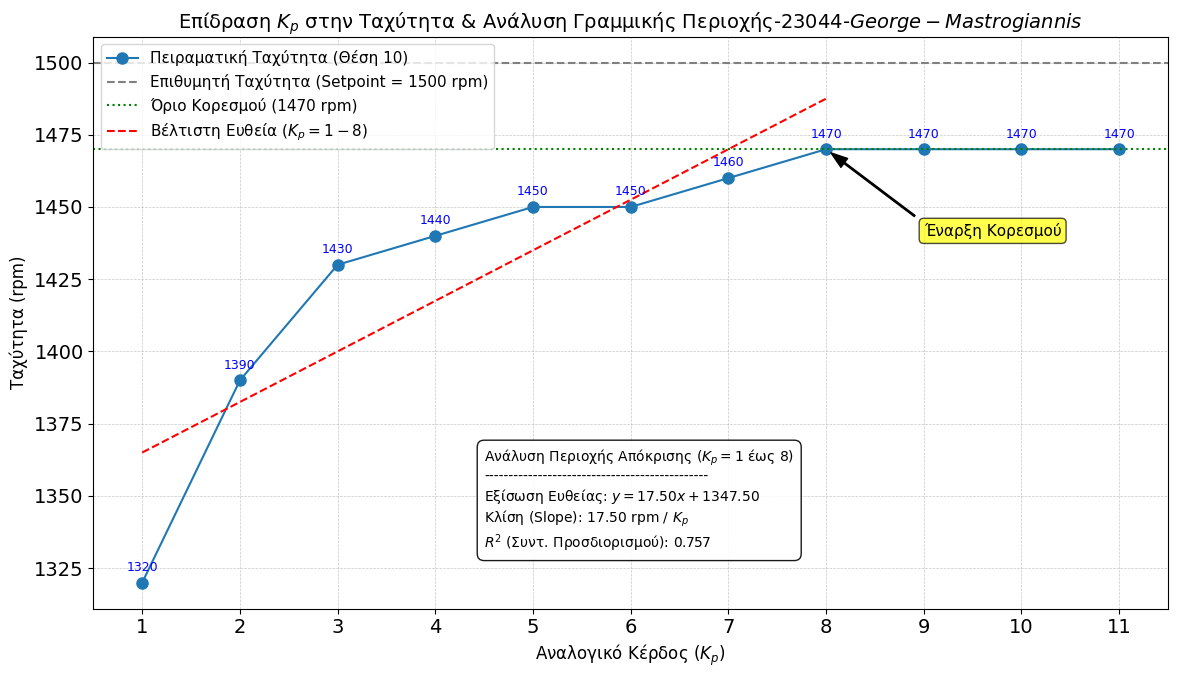

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats # Import για τη γραμμική παλινδρόμηση

# Δεδομένα από τον Πίνακα 7
Kp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Speed_Load_10 = [1320, 1390, 1430, 1440, 1450, 1450, 1460, 1470, 1470, 1470, 1470]
Setpoint = 1500

# --- Υπολογισμός Βέλτιστης Ευθείας (Linear Regression) ---
# Θα αναλύσουμε μόνο την περιοχή *πριν* τον κορεσμό, όπου το Kp έχει επίδραση.
# Αυτή είναι από το Kp=1 έως το Kp=8 (index 0 έως 7).
Kp_linear = np.array(Kp[0:8])
Speed_linear = np.array(Speed_Load_10[0:8])

# Εκτέλεση γραμμικής παλινδρόμησης
slope, intercept, r_value, p_value, std_err = stats.linregress(Kp_linear, Speed_linear)

# Δημιουργία των σημείων (x,y) για τη γραμμή παλινδρόμησης
y_fit = slope * Kp_linear + intercept

# --- Δημιουργία Γραφήματος ---
plt.figure(figsize=(12, 7)) # Μεγαλύτερο μέγεθος για να χωράνε οι ετικέτες

# Κύρια γραμμή δεδομένων
plt.plot(Kp, Speed_Load_10, marker='o', linestyle='-', markersize=8, label='Πειραματική Ταχύτητα (Θέση 10)')

# 1. ΠΡΟΣΘΗΚΗ ΤΙΜΩΝ ΠΑΝΩ ΣΤΑ ΣΗΜΕΙΑ
for i in range(len(Kp)):
    # Προσθέτει το κείμενο (την τιμή rpm) λίγο πιο πάνω από το σημείο
    plt.text(Kp[i], Speed_Load_10[i] + 3, str(Speed_Load_10[i]),
             ha='center', va='bottom', fontsize=9, color='blue')

# Σταθερές Γραμμές
plt.axhline(y=Setpoint, color='grey', linestyle='--', label=f'Επιθυμητή Ταχύτητα (Setpoint = {Setpoint} rpm)')
plt.axhline(y=1470, color='g', linestyle=':', label=f'Όριο Κορεσμού ({1470} rpm)')

# Σημείωση για την έναρξη του κορεσμού
plt.annotate('Έναρξη Κορεσμού',
             xy=(8, 1470),
             xytext=(9, 1440),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="k", lw=1, alpha=0.7))

# 2. ΠΡΟΣΘΗΚΗ ΒΕΛΤΙΣΤΗΣ ΕΥΘΕΙΑΣ
plt.plot(Kp_linear, y_fit, 'r--',
         label=f'Βέλτιστη Ευθεία ($K_p=1-8$)')

# 3. ΠΡΟΣΘΗΚΗ INFOBOX
# Δημιουργία του κειμένου για το infobox
infobox_text = (
    f"Ανάλυση Περιοχής Απόκρισης ($K_p=1$ έως 8)\n"
    f"----------------------------------------------\n"
    f"Εξίσωση Ευθείας: $y = {slope:.2f}x + {intercept:.2f}$\n"
    f"Κλίση (Slope): {slope:.2f} rpm / $K_p$\n"
    f"$R^2$ (Συντ. Προσδιορισμού): {r_value**2:.3f}"
)

# Τοποθέτηση του infobox στο γράφημα
plt.text(4.5, 1330, infobox_text,
         bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1, alpha=0.9),
         fontsize=10, verticalalignment='bottom')


# Τίτλοι και Ετικέτες
plt.title('Επίδραση $K_p$ στην Ταχύτητα & Ανάλυση Γραμμικής Περιοχής-23044-$George-Mastrogiannis$', fontsize=14)
plt.xlabel('Αναλογικό Κέρδος ($K_p$)', fontsize=12)
plt.ylabel('Ταχύτητα (rpm)', fontsize=12)
plt.xticks(Kp)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Τοποθέτηση του legend (υπόμνημα)
plt.legend(loc='upper left', fontsize=11)

plt.tight_layout()

# Αποθήκευση του γραφήματος σε αρχείο PDF (ιδανικό για LaTeX/Overleaf)
plt.savefig('kp_vs_speed_plot_detailed.pdf')

print("Το γράφημα αποθηκεύτηκε ως 'kp_vs_speed_plot_detailed.pdf'.")
# plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

# --- 1. Δεδομένα από τους Πίνακες ---

# Κοινός άξονας Χ για Ανοικτό Σύστημα και για όλες τις Συγκρίσεις:
load_position = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Πίνακας 1: Ανοικτό Σύστημα, Αργή (1000 rpm)
speed_open_slow = np.array([1000, 995, 990, 950, 900, 860, 830, 800, 750, 700, 660])
current_open_slow = np.array([0.50, 0.55, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.90, 1.00, 1.10])

# Πίνακας 2: Ανοικτό Σύστημα, Γρήγορη (2000 rpm)
speed_open_fast = np.array([2000, 2000, 1990, 1900, 1770, 1690, 1630, 1580, 1490, 1370, 1290])
current_open_fast = np.array([0.50, 0.55, 0.55, 0.70, 0.90, 1.05, 1.20, 1.30, 1.45, 1.65, 1.50])

# Πίνακας 3: Κλειστό Σύστημα, Αργή (1000 rpm)
v_tach_closed_slow = np.array([-2.77, -2.77, -2.77, -2.73, -2.68, -2.65, -2.62, -2.59, -2.55, -2.47, -2.43])
speed_closed_slow = np.array([1000, 1000, 1000, 980, 970, 960, 940, 930, 920, 890, 880])
current_closed_slow = np.array([0.50, 0.50, 0.50, 0.55, 0.65, 0.70, 0.80, 0.90, 1.00, 1.20, 1.35])

# Πίνακας 4: Κλειστό Σύστημα, Γρήγορη (2000 rpm)
v_tach_closed_fast = np.array([-5.53, -5.53, -5.53, -5.44, -5.38, -5.29, -5.20, -5.13, -4.72, -4.22, -3.58])
speed_closed_fast = np.array([2000, 2000, 2000, 1980, 1950, 1920, 1890, 1860, 1710, 1530, 1300])
current_closed_fast = np.array([0.65, 0.70, 0.75, 0.90, 1.15, 1.30, 1.35, 1.55, 1.75, 1.85, 1.90])

# Πίνακας 6: Κλειστό Σύστημα με Kp=2, Αργή (1000 rpm)
v_tach_kp2_slow = np.array([-2.77, -2.76, -2.76, -2.74, -2.71, -2.70, -2.67, -2.65, -2.62, -2.58, -2.55])
speed_kp2_slow = np.array([1000, 1000, 1000, 990, 980, 970, 960, 960, 945, 930, 920])
current_kp2_slow = np.array([0.50, 0.50, 0.50, 0.50, 0.65, 0.70, 0.80, 0.90, 1.10, 1.25, 1.40])

# Πίνακας 7: Κλειστό Σύστημα με Kp=2, Γρήγορη (2000 rpm)
v_tach_kp2_fast = np.array([-5.51, -5.51, -5.50, -5.46, -5.40, -5.35, -5.30, -5.08, -4.67, -4.12, -3.48])
speed_kp2_fast = np.array([2000, 2000, 2000, 1980, 1960, 1940, 1920, 1850, 1700, 1500, 1260])
current_kp2_fast = np.array([0.50, 0.50, 0.55, 0.65, 1.00, 1.20, 1.30, 1.50, 1.60, 1.70, 1.80])

# Πίνακας "7" (Επίδραση Kp) [122]
kp_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
speed_at_load_10 = np.array([1320, 1390, 1430, 1440, 1450, 1450, 1460, 1470, 1470, 1470, 1470])


# --- 2. Βοηθητικές Συναρτήσεις Γραφικών ---

# Στυλ πλαισίου πληροφοριών παλινδρόμησης
infobox_props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

def plot_characteristic(x, y, x_label, y_label, title, data_label, save_path, show_regression=True, plot_as_line=False):
    """
    Δημιουργεί ένα γράφημα για ένα σύνολο δεδομένων, με προαιρετική γραμμική παλινδρόμηση.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Λόγω αρνητικών τιμών στον άξονα V2, πρέπει να βρούμε πού να τοποθετήσουμε το info-box
    x_min, x_max = np.min(x), np.max(x)
    text_x_pos = 0.05 if x_min >= 0 else 0.65 # Μετακίνηση δεξιά αν ο άξονας Χ είναι αρνητικός

    if plot_as_line:
        ax.plot(x, y, 'o-', label=data_label) # Σημεία συνδεδεμένα με γραμμή
    else:
        ax.scatter(x, y, label=data_label, color='blue') # Διάγραμμα σκεδασμού

    if show_regression:
        # Υπολογισμός γραμμικής παλινδρόμησης
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Δημιουργία γραμμής παλινδρόμησης
        # Δημιουργούμε σημεία γραμμής παλινδρόμησης αντί για x, y_fit για ομαλή γραμμή
        x_fit_line = np.linspace(x_min, x_max, 100)
        y_fit_line = slope * x_fit_line + intercept
        ax.plot(x_fit_line, y_fit_line, color='red', linestyle='--', label='Γραμμή Παλινδρόμησης')

        # Κείμενο για το infobox
        regression_text = (
            f'Γραμμή Παλινδρόμησης:\n'
            f'$y = {slope:.2f}x + {intercept:.2f}$\n'
            f'$R^2 = {r_value**2:.4f}$'
        )
        # Προσθήκη του infobox
        ax.text(text_x_pos, 0.05, regression_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='bottom', bbox=infobox_props)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, linestyle=':')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)
    print(f"Δημιουργήθηκε το γράφημα: {save_path}")

def plot_comparison(x1, y1, label1, x2, y2, label2, x_label, y_label, title, save_path):
    """
    Δημιουργεί ένα γράφημα σύγκρισης για δύο σύνολα δεδομένων, με παλινδρόμηση για το καθένα.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Δεδομένα 1
    ax.scatter(x1, y1, label=label1, color='blue', alpha=0.7)
    slope1, intercept1, r1, _, _ = stats.linregress(x1, y1)
    x1_fit_line = np.linspace(np.min(x1), np.max(x1), 100)
    y_fit1 = slope1 * x1_fit_line + intercept1
    ax.plot(x1_fit_line, y_fit1, color='blue', linestyle='--', label=f'Παλινδρόμηση ({label1})')

    # Δεδομένα 2
    ax.scatter(x2, y2, label=label2, color='green', alpha=0.7)
    slope2, intercept2, r2, _, _ = stats.linregress(x2, y2)
    x2_fit_line = np.linspace(np.min(x2), np.max(x2), 100)
    y_fit2 = slope2 * x2_fit_line + intercept2
    ax.plot(x2_fit_line, y_fit2, color='green', linestyle=':', label=f'Παλινδρόμηση ({label2})')

    # Κείμενο για το infobox
    regression_text = (
        f'{label1}:\n'
        f'$y = {slope1:.2f}x + {intercept1:.2f}$, $R^2 = {r1**2:.4f}$\n\n'
        f'{label2}:\n'
        f'$y = {slope2:.2f}x + {intercept2:.2f}$, $R^2 = {r2**2:.4f}$'
    )
    # Προσθήκη του infobox
    ax.text(0.05, 0.05, regression_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', bbox=infobox_props)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, linestyle=':')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)
    print(f"Δημιουργήθηκε το γράφημα: {save_path}")

# --- 3. Κύρια Συνάρτηση Δημιουργίας Γραφικών ---

def generate_all_plots():
    # Δημιουργία φακέλου για τις εικόνες
    output_dir = "lab_plots"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Ετικέτες Άξονα Χ
    x_axis_label_load_pos = "Θέση Φορτίου (proxy για Ροπή)"
    x_axis_label_v_tach = "Τάση Ταχογεννήτριας V2 (V) (proxy για Ροπή)"

    # --- Μέρος Α', Ερώτημα 3 (Ανοικτό Σύστημα) ---
    # Χρησιμοποιούμε 'load_position' επειδή V2 δεν υπάρχει [32, 37]
    # 1. Ταχύτητα-Ροπή (Αργή)
    plot_characteristic(load_position, speed_open_slow, x_axis_label_load_pos, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Ανοικτό, Αργό)",
                        "Δεδομένα (Πίνακας 1)", os.path.join(output_dir, "plot_01_speed_open_slow.png"))

    # 2. Ρεύμα-Ροπή (Αργή)
    plot_characteristic(load_position, current_open_slow, x_axis_label_load_pos, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Ανοικτό, Αργό)",
                        "Δεδομένα (Πίνακας 1)", os.path.join(output_dir, "plot_02_current_open_slow.png"))

    # 3. Ταχύτητα-Ροπή (Γρήγορη)
    plot_characteristic(load_position, speed_open_fast, x_axis_label_load_pos, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Ανοικτό, Γρήγορο)",
                        "Δεδομένα (Πίνακας 2)", os.path.join(output_dir, "plot_03_speed_open_fast.png"))

    # 4. Ρεύμα-Ροπή (Γρήγορη)
    plot_characteristic(load_position, current_open_fast, x_axis_label_load_pos, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Ανοικτό, Γρήγορο)",
                        "Δεδομένα (Πίνακας 2)", os.path.join(output_dir, "plot_04_current_open_fast.png"))

    # --- Μέρος Α', Β2 Ερώτημα 3 (Κλειστό Σύστημα) ---
    # Χρησιμοποιούμε 'v_tach' όπως ζητήθηκε [56, 61]
    # 5. Ταχύτητα-Ροπή (Αργή)
    plot_characteristic(v_tach_closed_slow, speed_closed_slow, x_axis_label_v_tach, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Κλειστό, Αργό)",
                        "Δεδομένα (Πίνακας 3)", os.path.join(output_dir, "plot_05_speed_closed_slow.png"))

    # 6. Ρεύμα-Ροπή (Αργή)
    plot_characteristic(v_tach_closed_slow, current_closed_slow, x_axis_label_v_tach, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Κλειστό, Αργό)",
                        "Δεδομένα (Πίνακας 3)", os.path.join(output_dir, "plot_06_current_closed_slow.png"))

    # 7. Ταχύτητα-Ροπή (Γρήγορη)
    plot_characteristic(v_tach_closed_fast, speed_closed_fast, x_axis_label_v_tach, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Κλειστό, Γρήγορο)",
                        "Δεδομένα (Πίνακας 4)", os.path.join(output_dir, "plot_07_speed_closed_fast.png"))

    # 8. Ρεύμα-Ροπή (Γρήγορη)
    plot_characteristic(v_tach_closed_fast, current_closed_fast, x_axis_label_v_tach, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Κλειστό, Γρήγορο)",
                        "Δεδομένα (Πίνακας 4)", os.path.join(output_dir, "plot_08_current_closed_fast.png"))

    # --- Μέρος Α', Β2 Ερωτήματα 4-7 (Συγκρίσεις) ---
    # Χρησιμοποιούμε 'load_position' για να είναι δυνατή η σύγκριση [65, 68, 71, 74]
    # 9. Σύγκριση Ταχύτητας (Αργή)
    plot_comparison(load_position, speed_open_slow, "Ανοικτό (Πίν. 1)",
                    load_position, speed_closed_slow, "Κλειστό (Πίν. 3)",
                    x_axis_label_load_pos, "Ταχύτητα (rpm)",
                    "Σύγκριση Ταχύτητας (Αργή) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_09_compare_speed_slow.png"))

    # 10. Σύγκριση Ταχύτητας (Γρήγορη)
    plot_comparison(load_position, speed_open_fast, "Ανοικτό (Πίν. 2)",
                    load_position, speed_closed_fast, "Κλειστό (Πίν. 4)",
                    x_axis_label_load_pos, "Ταχύτητα (rpm)",
                    "Σύγκριση Ταχύτητας (Γρήγορη) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_10_compare_speed_fast.png"))

    # 11. Σύγκριση Ρεύματος (Αργή)
    plot_comparison(load_position, current_open_slow, "Ανοικτό (Πίν. 1)",
                    load_position, current_closed_slow, "Κλειστό (Πίν. 3)",
                    x_axis_label_load_pos, "Ρεύμα (A)",
                    "Σύγκριση Ρεύματος (Αργή) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_11_compare_current_slow.png"))

    # 12. Σύγκριση Ρεύματος (Γρήγορη)
    plot_comparison(load_position, current_open_fast, "Ανοικτό (Πίν. 2)",
                    load_position, current_closed_fast, "Κλειστό (Πίν. 4)",
                    x_axis_label_load_pos, "Ρεύμα (A)",
                    "Σύγκριση Ρεύματος (Γρήγορη) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_12_compare_current_fast.png"))

    # --- Μέρος Β', Ερώτημα 4 (Αναλογικός Ελεγκτής Kp=2) ---
    # Χρησιμοποιούμε 'v_tach' όπως ζητήθηκε [107, 112]
    # 13. Ταχύτητα-Ροπή (Αργή, Kp=2)
    plot_characteristic(v_tach_kp2_slow, speed_kp2_slow, x_axis_label_v_tach, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Kp=2, Αργό)",
                        "Δεδομένα (Πίνακας 6)", os.path.join(output_dir, "plot_13_speed_kp2_slow.png"))

    # 14. Ρεύμα-Ροπή (Αργή, Kp=2)
    plot_characteristic(v_tach_kp2_slow, current_kp2_slow, x_axis_label_v_tach, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Kp=2, Αργό)",
                        "Δεδομένα (Πίνακας 6)", os.path.join(output_dir, "plot_14_current_kp2_slow.png"))

    # 15. Ταχύτητα-Ροπή (Γρήγορη, Kp=2)
    plot_characteristic(v_tach_kp2_fast, speed_kp2_fast, x_axis_label_v_tach, "Ταχύτητα (rpm)",
                        "Χαρακτηριστική Ταχύτητας (Kp=2, Γρήγορο)",
                        "Δεδομένα (Πίνακας 7)", os.path.join(output_dir, "plot_15_speed_kp2_fast.png"))

    # 16. Ρεύμα-Ροπή (Γρήγορη, Kp=2)
    plot_characteristic(v_tach_kp2_fast, current_kp2_fast, x_axis_label_v_tach, "Ρεύμα (A)",
                        "Χαρακτηριστική Ρεύματος (Kp=2, Γρήγορο)",
                        "Δεδομένα (Πίνακας 7)", os.path.join(output_dir, "plot_16_current_kp2_fast.png"))

    # --- Μέρος Β', Ερώτημα 5 (Συγκρίσεις Κλειστού vs Kp=2) ---
    # Χρησιμοποιούμε 'load_position' για να είναι δυνατή η σύγκριση [116]
    # 17. Σύγκριση Ταχύτητας (Αργή, Κλειστό vs Kp=2)
    plot_comparison(load_position, speed_closed_slow, "Κλειστό (Πίν. 3)",
                    load_position, speed_kp2_slow, "Kp=2 (Πίν. 6)",
                    x_axis_label_load_pos, "Ταχύτητα (rpm)",
                    "Σύγκριση Ταχύτητας: Κλειστό vs Kp=2 (Αργή) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_17_compare_speed_slow_kp.png"))

    # 18. Σύγκριση Ταχύτητας (Γρήγορη, Κλειστό vs Kp=2)
    plot_comparison(load_position, speed_closed_fast, "Κλειστό (Πίν. 4)",
                    load_position, speed_kp2_fast, "Kp=2 (Πίν. 7)",
                    x_axis_label_load_pos, "Ταχύτητα (rpm)",
                    "Σύγκριση Ταχύτητας: Κλειστό vs Kp=2 (Γρήγορη) [vs Θέση Φορτίου]",
                    os.path.join(output_dir, "plot_18_compare_speed_fast_kp.png"))

    # --- Μέρος Β', Ερώτημα 6 (Επίδραση Kp) ---
    # Αυτό το γράφημα έχει τον δικό του άξονα Χ (Kp) [122]
    # 19. Επίδραση Kp στην Ταχύτητα (σε πλήρες φορτίο)
    plot_characteristic(kp_values, speed_at_load_10, "Αναλογικό Κέρδος (Kp)", "Ταχύτητα (rpm) στη Θέση 10",
                        "Επίδραση Kp στην Ταχύτητα σε Πλήρες Φορτίο",
                        "Δεδομένα (Πίνακας 7 [122])", os.path.join(output_dir, "plot_19_kp_effect.png"),
                        show_regression=False, plot_as_line=True) # Όχι παλινδρόμηση εδώ

# --- 4. Εκτέλεση Κώδικα ---
if __name__ == "__main__":
    generate_all_plots()
    print("\n--- ΟΛΕΣ ΟΙ ΓΡΑΦΙΚΕΣ ΠΑΡΑΣΤΑΣΕΙΣ ΔΗΜΙΟΥΡΓΗΘΗΚΑΝ ---")
    print(f"Θα τις βρείτε στον φάκελο '{os.path.abspath('lab_plots')}'")

Δημιουργήθηκε το γράφημα: lab_plots/plot_01_speed_open_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_02_current_open_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_03_speed_open_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_04_current_open_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_05_speed_closed_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_06_current_closed_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_07_speed_closed_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_08_current_closed_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_09_compare_speed_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_10_compare_speed_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_11_compare_current_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_12_compare_current_fast.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_13_speed_kp2_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_14_current_kp2_slow.png
Δημιουργήθηκε το γράφημα: lab_plots/plot_15_speed_kp2_fast.png
Δημιουργή